First we define the function:

In [ ]:
from matplotlib import pyplot
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Process the Trips CSV file
trips_df = pd.read_csv("../../ferry_tips_data.csv")
print(trips_df["trip_type"].unique())

# makes a nice chart of the average amount of stuff carried.
def average_load_by_hour(route_id:int, day_of_week:int):
    #filter for chosen route and make sure to only count ordinary trips
    route_df = trips_df[(trips_df["route_id"] == route_id) & (trips_df["trip_type"] == "ordinary           ")] #The type ordinary has a bunch of spaces in the csv.
    route_name = route_df["route_name"].iloc[0]


    #make time departure a datetime
    route_df.loc[:, "time_departure"] = route_df["time_departure"].apply(lambda x: datetime.datetime.fromisoformat(x))
    route_df["weekday"] = route_df["time_departure"].apply(lambda x: x.weekday())
    route_df = route_df[route_df["weekday"] == day_of_week]
    route_df["hour"] = route_df["time_departure"].apply(lambda x: x.hour)

    # calculate mean of all loads in the same hour.
    hourly_df = route_df.groupby("hour", as_index=False).mean(numeric_only=True)
    return hourly_df

def average_then_plot(route_id:int, day_of_week:int):
    hourly_df = average_load_by_hour(route_id, day_of_week)
    plt.bar(hourly_df["hour"], hourly_df["cars_outbound"])
    plt.title("Average cars carried by hour on route: " + str(route_id))
    plt.xticks(range(24))
    plt.show()

['ordinary           ' 'doubtful         ' 'extra               '
 'proactive            ' 'doubling          ']


Breakdown by route:

17


C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())


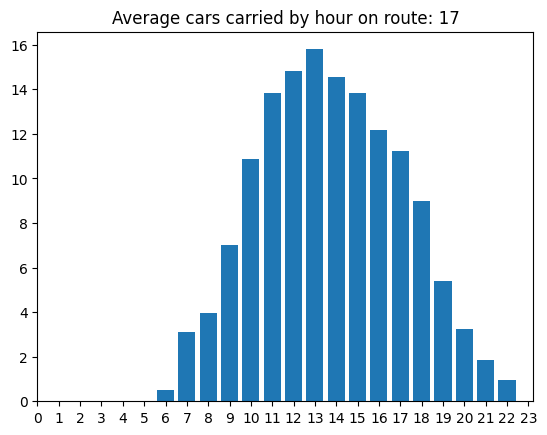

C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())
C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())


16


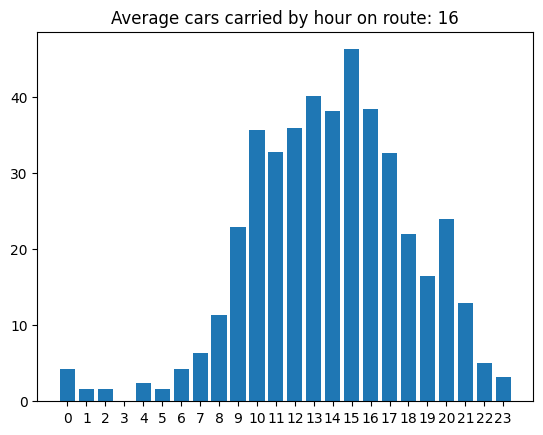

C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())
C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())


12


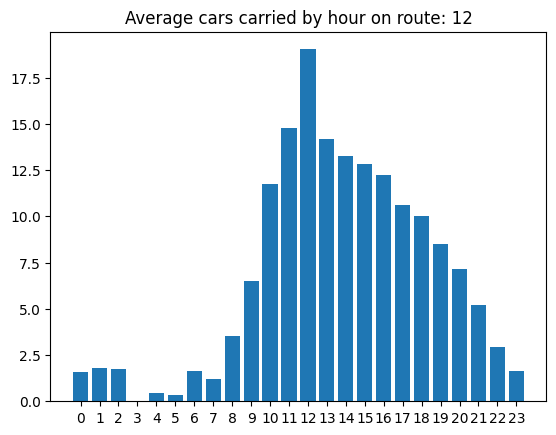

C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())
C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())


21


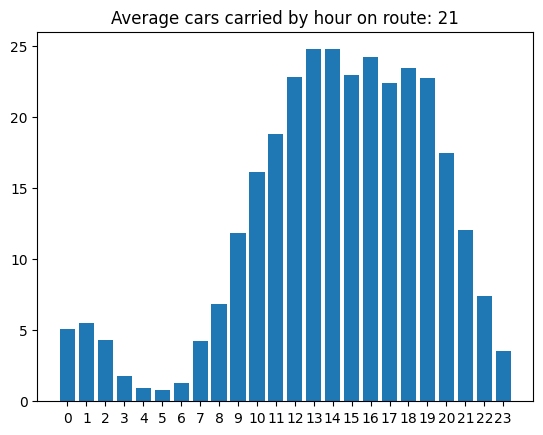

38


C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())
C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())


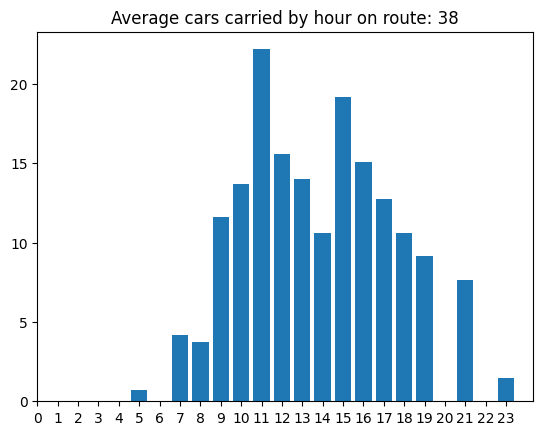

C:\Users\Gyurka\AppData\Local\Temp\ipykernel_33516\615543321.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df.loc[:, "weekday"] = route_df.loc[:, "time_departure"].apply(lambda x: x.weekday())


In [56]:
for route in trips_df["route_id"].unique():
    print(route)
    average_then_plot(route, 6)
    average_load_by_hour(route, 3)